# Retrieving Data

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

# Enter the code to create a SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName('myApp') \
 .setMaster('local') 
sc = SparkContext(conf=conf) 
spark = SparkSession(sc) 

In [10]:
# df = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/train.csv')
df = spark.read.format('csv').options(header=True).load('D:/Apps/Anaconda/envs/kuliah/Big Data/dataset/car/train.csv')
df.show(30, truncate=50)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+--------------+-----------------+-------------------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|    max_torque|        max_power|              engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type

In [11]:
# dt = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/test.csv')
dt = spark.read.format('csv').options(header=True).load('D:/Apps/Anaconda/envs/kuliah/Big Data/dataset/car/test.csv')
dt.show(30, truncate=50)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+--------------+-----------------+---------------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|    max_torque|        max_power|          engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|l

In [12]:
df.printSchema()
dt.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- policy_tenure: string (nullable = true)
 |-- age_of_car: string (nullable = true)
 |-- age_of_policyholder: string (nullable = true)
 |-- area_cluster: string (nullable = true)
 |-- population_density: string (nullable = true)
 |-- make: string (nullable = true)
 |-- segment: string (nullable = true)
 |-- model: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- max_torque: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- airbags: string (nullable = true)
 |-- is_esc: string (nullable = true)
 |-- is_adjustable_steering: string (nullable = true)
 |-- is_tpms: string (nullable = true)
 |-- is_parking_sensors: string (nullable = true)
 |-- is_parking_camera: string (nullable = true)
 |-- rear_brakes_type: string (nullable = true)
 |-- displacement: string (nullable = true)
 |-- cylinder: string (nullable = true)
 |-- transmission_type: string (nullable =

In [13]:
# Print distinct values for particular columns
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']

for column in columns:
    df.select(column).distinct().sort(column).show()

+-----------------+
|    policy_tenure|
+-----------------+
|0.002735272840513|
|0.002739076804786|
|0.002740315011665|
|0.002747851054561|
|0.002749571040505|
|0.002750120003537|
|0.002762931455565|
|0.002764654470039|
|0.002768301058828|
|0.002768900638215|
|0.002770853710949|
|0.002771893273467|
|0.002771917589332|
|0.002772798922012|
| 0.00277288700797|
|0.002773005748767|
|0.002775147283016|
|0.002776876086524|
|0.002782401164926|
|0.002782678543186|
+-----------------+
only showing top 20 rows

+----------+
|age_of_car|
+----------+
|         0|
|      0.01|
|      0.02|
|      0.03|
|      0.04|
|      0.05|
|      0.06|
|      0.07|
|      0.08|
|      0.09|
|       0.1|
|      0.11|
|      0.12|
|      0.13|
|      0.14|
|      0.15|
|      0.16|
|      0.17|
|      0.18|
|      0.19|
+----------+
only showing top 20 rows

+-------------------+
|age_of_policyholder|
+-------------------+
|  0.288461538461538|
|  0.298076923076923|
|  0.307692307692308|
|  0.317307692307692|
| 

In [14]:
# Print distinct values for particular columns
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']

for column in columns:
    dt.select(column).distinct().sort(column).show()

+-----------------+
|    policy_tenure|
+-----------------+
|0.002745051196579|
|0.002745544788791|
|0.002747034501159|
|0.002747994940671|
|0.002753019205385|
|0.002753785091627|
|0.002759427602193|
|0.002764604423371|
|0.002770183835773|
|0.002774601299284|
| 0.00277907278365|
|0.002782481806645|
|0.002785199142261|
|0.002791475086914|
|0.002796811414699|
|0.002811511184285|
|0.002817834904417|
| 0.00281852987206|
|0.002826306979202|
|0.002826785497922|
+-----------------+
only showing top 20 rows

+----------+
|age_of_car|
+----------+
|         0|
|      0.01|
|      0.02|
|      0.03|
|      0.04|
|      0.05|
|      0.06|
|      0.07|
|      0.08|
|      0.09|
|       0.1|
|      0.11|
|      0.12|
|      0.13|
|      0.14|
|      0.15|
|      0.16|
|      0.17|
|      0.18|
|      0.19|
+----------+
only showing top 20 rows

+-------------------+
|age_of_policyholder|
+-------------------+
|  0.288461538461538|
|  0.298076923076923|
|  0.307692307692308|
|  0.317307692307692|
| 

# Summary Statistics

In [15]:
df.summary().show()

+-------+---------+-------------------+--------------------+-------------------+------------+------------------+------------------+-------+-----+---------+-------------+-----------------+-----------+------------------+------+----------------------+-------+------------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+-------------+-------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+------------------+-------------------+
|summary|policy_id|      policy_tenure|          age_of_car|age_of_policyholder|area_cluster|population_density|              make|segment|model|fuel_type|   max_torque|        max_power|engine_type|           airbags|i

In [16]:
dt.summary().show()

+-------+---------+-------------------+-------------------+-------------------+------------+------------------+------------------+-------+-----+---------+-------------+-----------------+-----------+------------------+------+----------------------+-------+------------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+-------------+-------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+------------------+
|summary|policy_id|      policy_tenure|         age_of_car|age_of_policyholder|area_cluster|population_density|              make|segment|model|fuel_type|   max_torque|        max_power|engine_type|           airbags|is_esc|is_adjustable_st

# Missing Values

In [17]:
df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()

+---------+-------------+----------+-------------------+------------+------------------+----+-------+-----+---------+----------+---------+-----------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|max_torque|max_power|engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weight|is_front_fo

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_17216\1667263262.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=null_counts_pd, x='column_name', y='missing_count', palette='viridis')


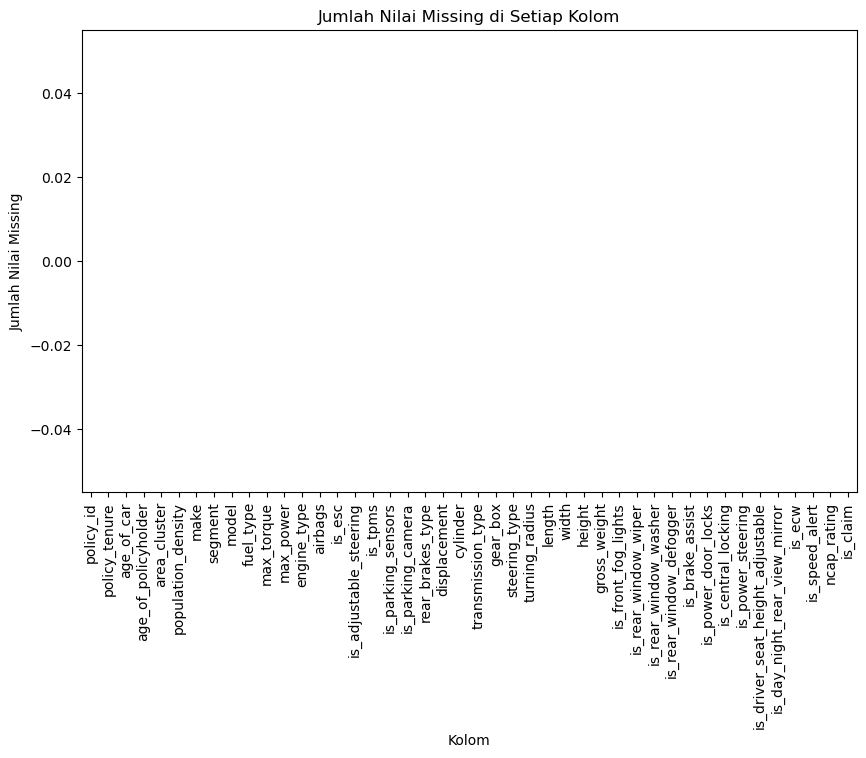

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
null_counts = df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns])

# Konversi ke Pandas DataFrame
null_counts_pd = null_counts.toPandas()

# Transpose dataframe agar lebih mudah digunakan untuk plotting
null_counts_pd = null_counts_pd.T
null_counts_pd.columns = ['missing_count']
null_counts_pd = null_counts_pd.reset_index()
null_counts_pd.columns = ['column_name', 'missing_count']

# Set plot size
plt.figure(figsize=(10, 6))

# Plot dengan Seaborn
sns.barplot(data=null_counts_pd, x='column_name', y='missing_count', palette='viridis')

# Tambahkan label dan judul
plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai Missing')
plt.title('Jumlah Nilai Missing di Setiap Kolom')
plt.xticks(rotation=90)  # Rotasi label x-axis untuk lebih mudah dibaca

# Tampilkan plot
# plt.tight_layout()  # Mengatur tata letak agar tidak terpotong
plt.show()

In [19]:
dt.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in dt.columns]).show()

+---------+-------------+----------+-------------------+------------+------------------+----+-------+-----+---------+----------+---------+-----------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+
|policy_id|policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|max_torque|max_power|engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weight|is_front_fog_lights|

# Duplicate Values

In [20]:
total_rowdf = df.count()
df_no_duplicates = df.dropDuplicates()
duplicate_count = total_rowdf - df_no_duplicates.count()
duplicate_percentage = duplicate_count / total_rowdf * 100

print(f'Ditemukan {duplicate_count} baris yang sama pada data train, ini adalah {duplicate_percentage:.2f}% dari data')

total_rowdt = dt.count()
dt_no_duplicates = dt.dropDuplicates()
duplicate_count = total_rowdt - dt_no_duplicates.count()
duplicate_percentage = duplicate_count / total_rowdt * 100

print(f'Ditemukan {duplicate_count} baris yang sama pada data test, ini adalah {duplicate_percentage:.2f}% dari data')

Ditemukan 0 baris yang sama pada data train, ini adalah 0.00% dari data
Ditemukan 0 baris yang sama pada data test, ini adalah 0.00% dari data


In [21]:
total_rowdf = df.count()
df_no_duplicates = df.dropDuplicates()
duplicate_count = total_rowdf - df_no_duplicates.count()
duplicate_percentage = duplicate_count / total_rowdf * 100

print(f'Ditemukan {duplicate_count} baris yang sama pada data train, ini adalah {duplicate_percentage:.2f}% dari data')

Ditemukan 0 baris yang sama pada data train, ini adalah 0.00% dari data


# EDA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#mencari area cluster mana yang paling banyak melakukan claim dan presentase claim di area cluster tersebut
df_filtered = df.filter(df['is_claim'] == 1)
df_selected = df_filtered.select('area_cluster', 'is_claim')
df_grouped = df_selected.groupBy('area_cluster').count()
df_grouped.show()

+------------+-----+
|area_cluster|count|
+------------+-----+
|          C6|   55|
|         C22|   17|
|         C21|   29|
|         C18|   26|
|          C3|  433|
|          C4|   51|
|         C11|   72|
|         C12|   87|
|         C14|  281|
|         C20|    5|
|          C5|  403|
|          C9|  136|
|         C16|   23|
|          C8|  954|
|         C13|  195|
|          C1|   76|
|          C2|  520|
|         C15|   38|
|          C7|  109|
|         C17|   19|
+------------+-----+
only showing top 20 rows



<Figure size 1200x800 with 0 Axes>

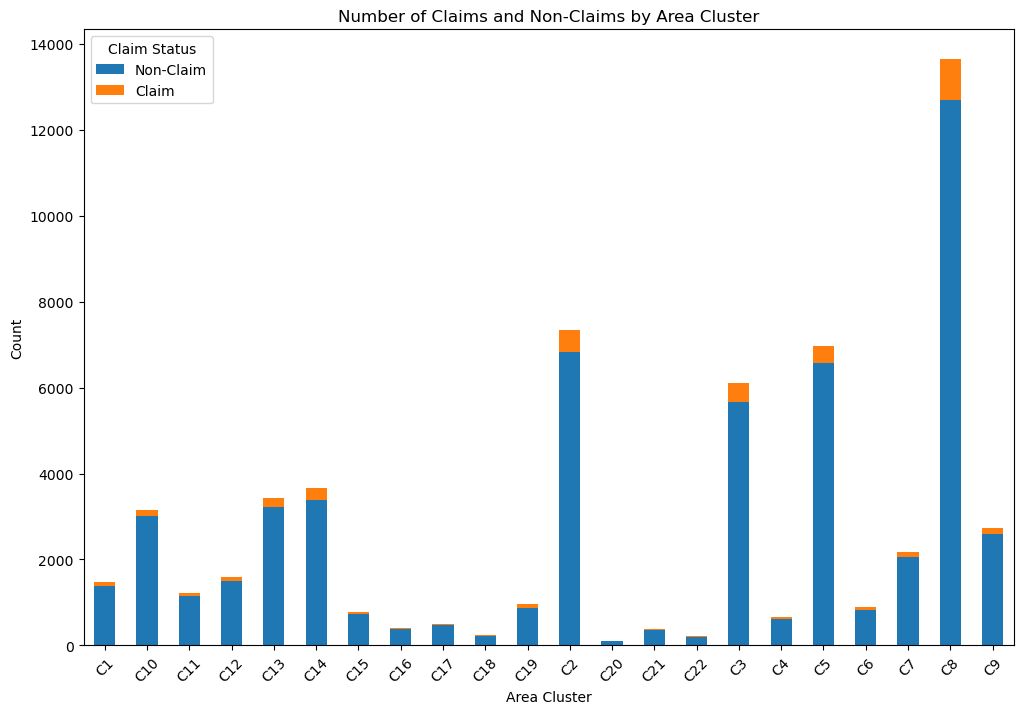

In [24]:
df_grouped = df.groupBy('area_cluster', 'is_claim').count()
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='area_cluster', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Area Cluster')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Area Cluster')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [25]:
#tujuan mencari tahu apakah density yang padat juga memiliki klaim terbanyak (bisa pake presentase)
df_max_density = df.groupBy('area_cluster').agg(max('population_density').alias('max_population_density'))
df_sorted = df_max_density.sort(col('max_population_density').desc())
df_sorted.show()
max_density_cluster = df_sorted.first()
print(f"Area cluster with the highest population density: {max_density_cluster['area_cluster']} with density {max_density_cluster['max_population_density']}")

+------------+----------------------+
|area_cluster|max_population_density|
+------------+----------------------+
|          C8|                  8794|
|         C14|                  7788|
|         C10|                 73430|
|         C17|                 65567|
|          C7|                  6112|
|         C11|                  6108|
|         C13|                  5410|
|          C1|                  4990|
|          C3|                  4076|
|         C18|                 35036|
|         C12|                 34791|
|          C5|                 34738|
|         C21|                  3264|
|         C15|                   290|
|         C19|                 27742|
|          C2|                 27003|
|          C4|                 21622|
|         C20|                 20905|
|          C9|                 17804|
|         C22|                 16733|
+------------+----------------------+
only showing top 20 rows

Area cluster with the highest population density: C8 with dens

In [26]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_parking_sensors").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

parking_sensors_claims = df_claims.filter(col("is_parking_sensors") == 'Yes').count()
no_parking_sensors_claims = df_claims.filter(col("is_parking_sensors") == 'No').count()

if parking_sensors_claims > no_parking_sensors_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai sensor parkir.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai sensor parkir.")

total_with_parking_sensors = df.filter(col("is_parking_sensors") == 'Yes').count()
total_no_parking_sensors = df.filter(col("is_parking_sensors") == 'No').count()

if total_with_parking_sensors > 0:
    percentage_with_sensors_and_claims = (parking_sensors_claims / total_with_parking_sensors) * 100
    print(f"Persentase mobil dengan sensor parkir yang melakukan klaim adalah {percentage_with_sensors_and_claims:.2f}%.")
else:
    print("Tidak ada mobil dengan sensor parkir dalam dataset.")
    
if total_no_parking_sensors > 0:
    percentage_with_sensors_and_claims = (no_parking_sensors_claims / total_no_parking_sensors) * 100
    print(f"Persentase mobil tanpa sensor parkir yang melakukan klaim adalah {percentage_with_sensors_and_claims:.2f}%.")
else:
    print("Tidak ada mobil dengan sensor parkir dalam dataset.")

+------------------+-----------+
|is_parking_sensors|claim_count|
+------------------+-----------+
|                No|        128|
|               Yes|       3620|
+------------------+-----------+

+------------------+-----------+------------------+
|is_parking_sensors|claim_count|        percentage|
+------------------+-----------+------------------+
|                No|        128|3.4151547491995733|
|               Yes|       3620| 96.58484525080043|
+------------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim mempunyai sensor parkir.
Persentase mobil dengan sensor parkir yang melakukan klaim adalah 6.44%.
Persentase mobil tanpa sensor parkir yang melakukan klaim adalah 5.39%.


<Figure size 1200x800 with 0 Axes>

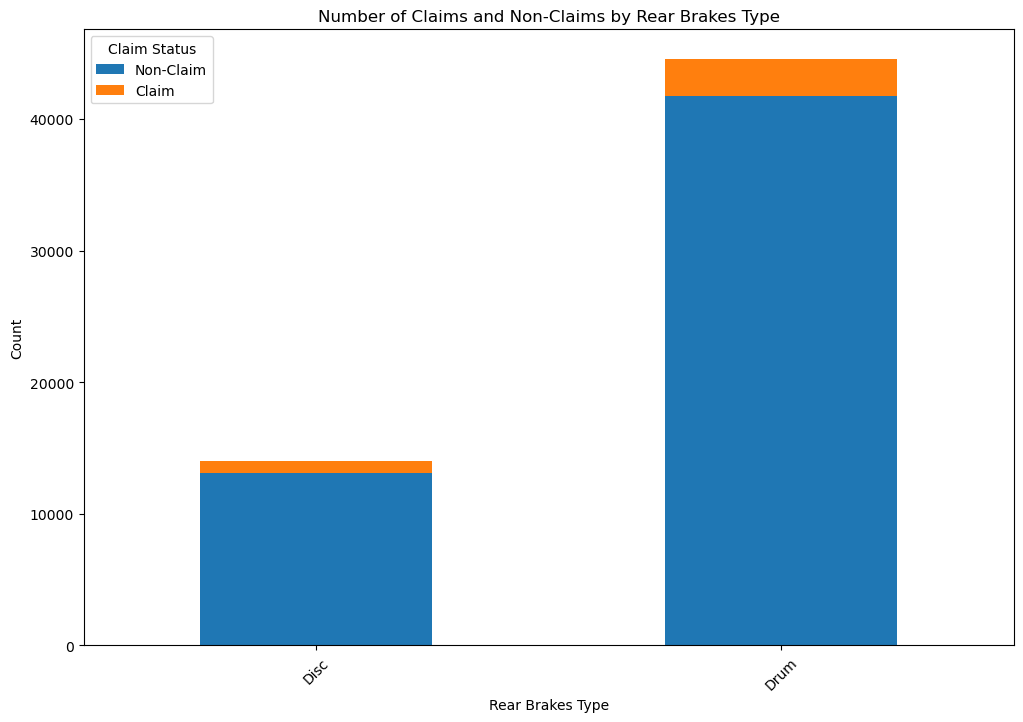

In [27]:
df_grouped = df.groupBy("is_claim", "rear_brakes_type").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='rear_brakes_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Rear Brakes Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Rear Brakes Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [28]:
from pyspark.sql.functions import col, count
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("rear_brakes_type").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

disc_brakes_claims = df_claims.filter(col("rear_brakes_type") == 'Disc').count()
drum_brakes_claims = df_claims.filter(col("rear_brakes_type") == 'Drum').count()

if disc_brakes_claims > drum_brakes_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe rear brake Disc.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe rear brake Drum.")

df_drum_brakes = df.filter(col("rear_brakes_type") == 'Drum')
df_disc_brakes = df.filter(col("rear_brakes_type") == 'Disc')

total_drum_brakes = df_drum_brakes.count()
total_disc_brakes = df_disc_brakes.count()

if total_drum_brakes > 0:
    drum_brakes_claim_percentage = (drum_brakes_claims / total_drum_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan tipe rear brake Drum dari total mobil dengan tipe ini adalah {drum_brakes_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe rear brake Drum dalam dataset.")

if total_disc_brakes > 0:
    disc_brakes_claim_percentage = (disc_brakes_claims / total_disc_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan tipe rear brake Disc dari total mobil dengan tipe ini adalah {disc_brakes_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan tipe rear brake disc dalam dataset.")

+----------------+-----------+
|rear_brakes_type|claim_count|
+----------------+-----------+
|            Drum|       2847|
|            Disc|        901|
+----------------+-----------+

+----------------+-----------+-----------------+
|rear_brakes_type|claim_count|       percentage|
+----------------+-----------+-----------------+
|            Drum|       2847|75.96051227321237|
|            Disc|        901|24.03948772678762|
+----------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki tipe rear brake Drum.
Persentase klaim untuk mobil dengan tipe rear brake Drum dari total mobil dengan tipe ini adalah 6.39%.
Persentase klaim untuk mobil dengan tipe rear brake Disc dari total mobil dengan tipe ini adalah 6.43%.


+----------------------+-----------+
|is_adjustable_steering|claim_count|
+----------------------+-----------+
|                    No|       1378|
|                   Yes|       2370|
+----------------------+-----------+

+----------------------+-----------+-----------------+
|is_adjustable_steering|claim_count|       percentage|
+----------------------+-----------+-----------------+
|                    No|       1378|36.76627534685166|
|                   Yes|       2370|63.23372465314835|
+----------------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim mempunyai adjustable steering.
Persentase mobil dengan adjustable steering yang melakukan klaim adalah 6.67%.
Persentase mobil tanpa adjustable steering yang melakukan klaim adalah 5.97%.


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_17216\983444658.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df, x='is_adjustable_steering', y='claim_count', palette='viridis')


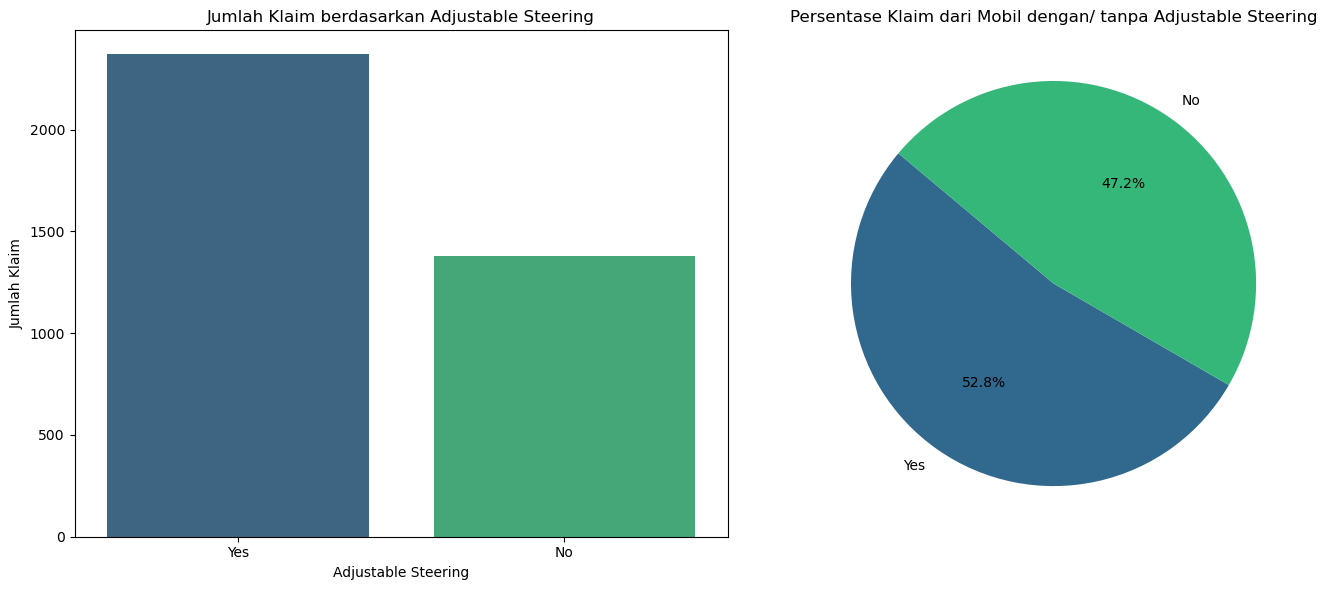

In [29]:
# Filter DataFrame untuk klaim
df_claims = df.filter(col("is_claim") == 1)

df_grouped = df_claims.groupBy("is_adjustable_steering").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

adjustable_steering_claims = df_claims.filter(col("is_adjustable_steering") == 'Yes').count()
no_adjustable_steering_claims = df_claims.filter(col("is_adjustable_steering") == 'No').count()

if adjustable_steering_claims > no_adjustable_steering_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai adjustable steering.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai adjustable steering.")

total_yes_AS = df.filter(col("is_adjustable_steering") == 'Yes').count()
total_no_AS = df.filter(col("is_adjustable_steering") == 'No').count()

if total_yes_AS > 0:
    adjustable_steering_claim_percentage = (adjustable_steering_claims / total_yes_AS) * 100
    print(f"Persentase mobil dengan adjustable steering yang melakukan klaim adalah {adjustable_steering_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan adjustable steering dalam dataset.")

if total_no_AS > 0:
    no_adjustable_steering_claim_percentage = (no_adjustable_steering_claims / total_no_AS) * 100
    print(f"Persentase mobil tanpa adjustable steering yang melakukan klaim adalah {no_adjustable_steering_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil tanpa adjustable steering dalam dataset.")

# Konversi hasil perhitungan ke Pandas DataFrame untuk visualisasi
result_data = {
    'is_adjustable_steering': ['Yes', 'No'],
    'total_cars': [total_yes_AS, total_no_AS],
    'claim_count': [adjustable_steering_claims, no_adjustable_steering_claims],
    'claim_percentage': [adjustable_steering_claim_percentage, no_adjustable_steering_claim_percentage]
}

result_df = pd.DataFrame(result_data)

# Set plot size
plt.figure(figsize=(14, 6))

# Bar Plot: Jumlah klaim berdasarkan adjustable steering
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.barplot(data=result_df, x='is_adjustable_steering', y='claim_count', palette='viridis')
plt.title('Jumlah Klaim berdasarkan Adjustable Steering')
plt.xlabel('Adjustable Steering')
plt.ylabel('Jumlah Klaim')

# Pie Chart: Persentase klaim dari total mobil dengan/ tanpa adjustable steering
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
labels = result_df['is_adjustable_steering']
sizes = result_df['claim_percentage']
colors = sns.color_palette('viridis', len(labels))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Klaim dari Mobil dengan/ tanpa Adjustable Steering')

# Tampilkan plot
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

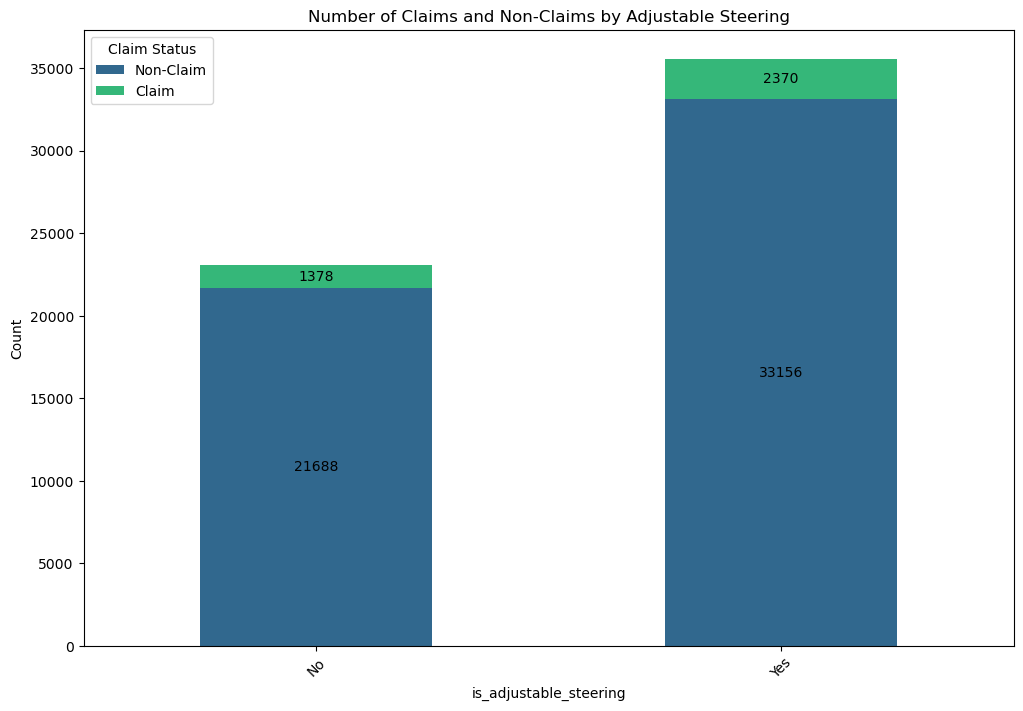

In [30]:
df_grouped = df.groupBy("is_claim", "is_adjustable_steering").agg(count("*").alias("count"))

df_pandas = df_grouped.toPandas()

df_pivot = df_pandas.pivot(index='is_adjustable_steering', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']

viridis_colors = sns.color_palette('viridis', len(df_pivot.columns))

plt.figure(figsize=(12, 8))
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=viridis_colors)

# Menambahkan label angka ke grafik
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    height = p.get_height()
    if height > 0:  # Pastikan kita tidak menambahkan label untuk batang dengan height 0
        ax.text(x, p.get_y() + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('is_adjustable_steering')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Adjustable Steering')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])

plt.show()

<Figure size 1200x800 with 0 Axes>

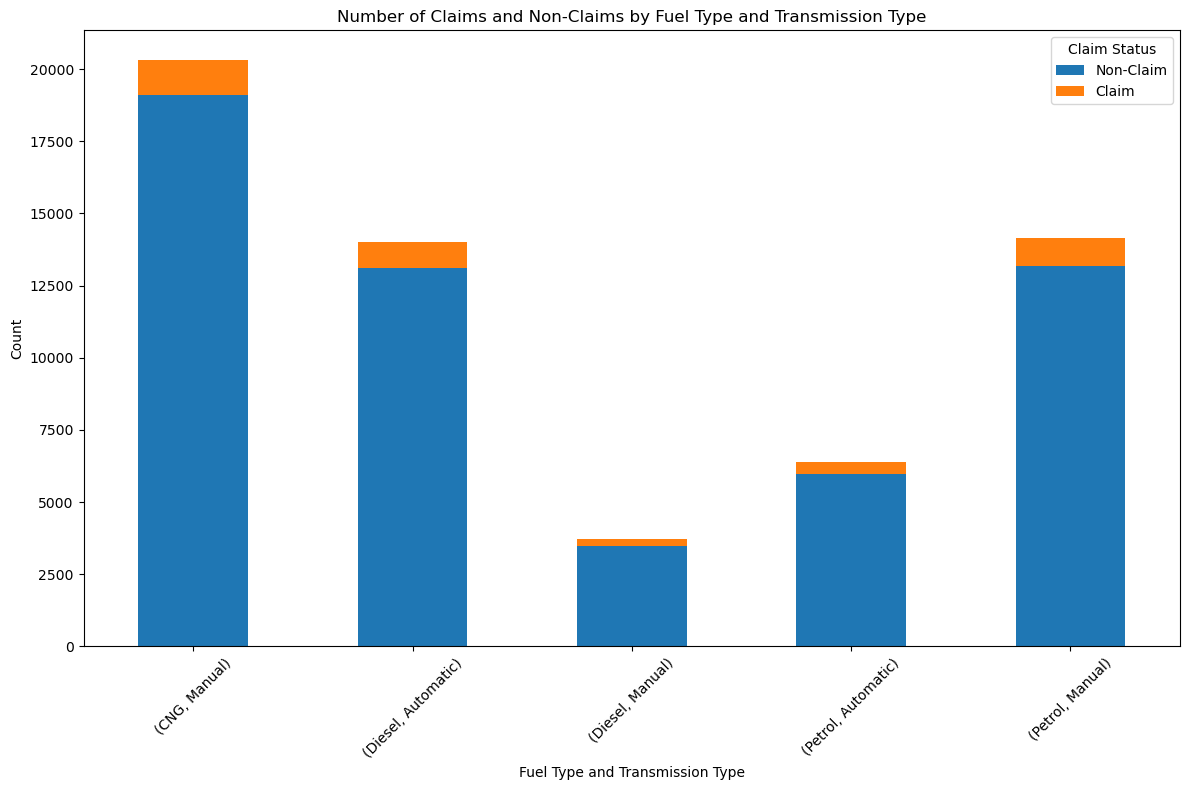

In [31]:
df_grouped = df.groupBy("is_claim", "fuel_type", "transmission_type").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index=['fuel_type', 'transmission_type'], columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Fuel Type and Transmission Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Fuel Type and Transmission Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.tight_layout()
plt.show()

In [32]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("fuel_type", "transmission_type").agg(count("*").alias("claim_count"))
df_grouped.show()
total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()
cng_fuel_type_claims = df_claims.filter(col("fuel_type") == "CNG").count()
diesel_fuel_type_claims = df_claims.filter(col("fuel_type") == "Diesel").count()
petrol_fuel_type_claims = df_claims.filter(col("fuel_type") == "Petrol").count()
auto_claims = df_claims.filter(col("transmission_type") == "Automatic").count()
manual_claims = df_claims.filter(col("transmission_type") == "Manual").count()

if auto_claims > manual_claims:
    if cng_fuel_type_claims > diesel_fuel_type_claims and cng_fuel_type_claims > petrol_fuel_type_claims:
        print("Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis dengan bahan bakar CNG")
    elif diesel_fuel_type_claims > petrol_fuel_type_claims and diesel_fuel_type_claims > cng_fuel_type_claims:
        print("Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis dengan bahan bakar Diesel")
    elif petrol_fuel_type_claims > cng_fuel_type_claims and petrol_fuel_type_claims > diesel_fuel_type_claims:
        print("Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis dengan bahan bakar Petrol.")
else:
    if cng_fuel_type_claims > diesel_fuel_type_claims and cng_fuel_type_claims > petrol_fuel_type_claims:
        print("Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis dengan bahan bakar CNG")
    elif diesel_fuel_type_claims > petrol_fuel_type_claims and diesel_fuel_type_claims > cng_fuel_type_claims:
        print("Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis dengan bahan bakar Diesel")
    elif petrol_fuel_type_claims > cng_fuel_type_claims and petrol_fuel_type_claims > diesel_fuel_type_claims:
        print("Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis dengan bahan bakar Petrol.")

+---------+-----------------+-----------+
|fuel_type|transmission_type|claim_count|
+---------+-----------------+-----------+
|   Petrol|        Automatic|        409|
|   Diesel|           Manual|        249|
|      CNG|           Manual|       1235|
|   Petrol|           Manual|        954|
|   Diesel|        Automatic|        901|
+---------+-----------------+-----------+

+---------+-----------------+-----------+------------------+
|fuel_type|transmission_type|claim_count|        percentage|
+---------+-----------------+-----------+------------------+
|   Petrol|        Automatic|        409| 10.91248665955176|
|   Diesel|           Manual|        249| 6.643543223052295|
|      CNG|           Manual|       1235|32.950907150480255|
|   Petrol|           Manual|        954|25.453575240128067|
|   Diesel|        Automatic|        901| 24.03948772678762|
+---------+-----------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim memiliki transmisi otomatis denga

<Figure size 1200x800 with 0 Axes>

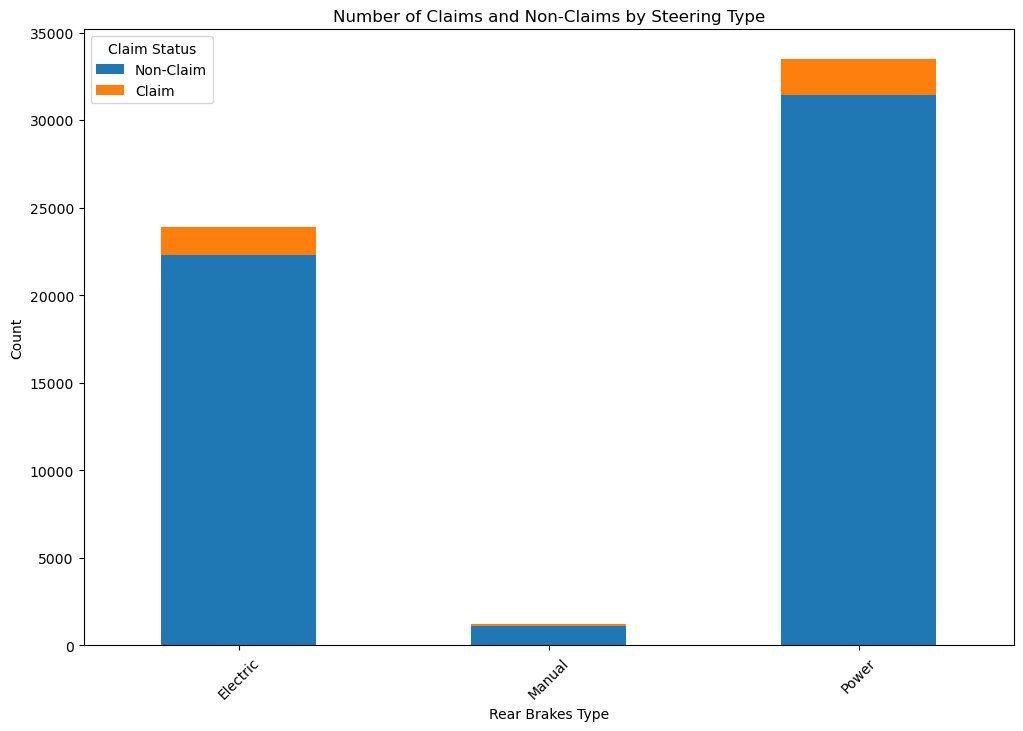

In [33]:
df_grouped = df.groupBy("is_claim", "steering_type").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='steering_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Rear Brakes Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Steering Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [34]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("steering_type").agg(count("*").alias("claim_count"))
df_grouped.show()
total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()
elt_steering_type_claims = df_claims.filter(col("steering_type") == "Electric").count()
man_steering_type_claims = df_claims.filter(col("steering_type") == "Manual").count()
pwr_steering_type_claims = df_claims.filter(col("steering_type") == "Power").count()

if elt_steering_type_claims > man_steering_type_claims and elt_steering_type_claims > pwr_steering_type_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe steering Electric.")
elif man_steering_type_claims > elt_steering_type_claims and man_steering_type_claims > pwr_steering_type_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe steering Manual.")
elif pwr_steering_type_claims > elt_steering_type_claims and pwr_steering_type_claims > man_steering_type_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki tipe steering Power.")
else:
    print("Tidak dapat menentukan tipe steering yang paling umum untuk mobil yang melakukan klaim.")

+-------------+-----------+
|steering_type|claim_count|
+-------------+-----------+
|        Power|       2078|
|       Manual|         73|
|     Electric|       1597|
+-------------+-----------+

+-------------+-----------+------------------+
|steering_type|claim_count|        percentage|
+-------------+-----------+------------------+
|        Power|       2078| 55.44290288153682|
|       Manual|         73|1.9477054429028817|
|     Electric|       1597|42.609391675560296|
+-------------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim memiliki tipe steering Power.


<Figure size 1200x800 with 0 Axes>

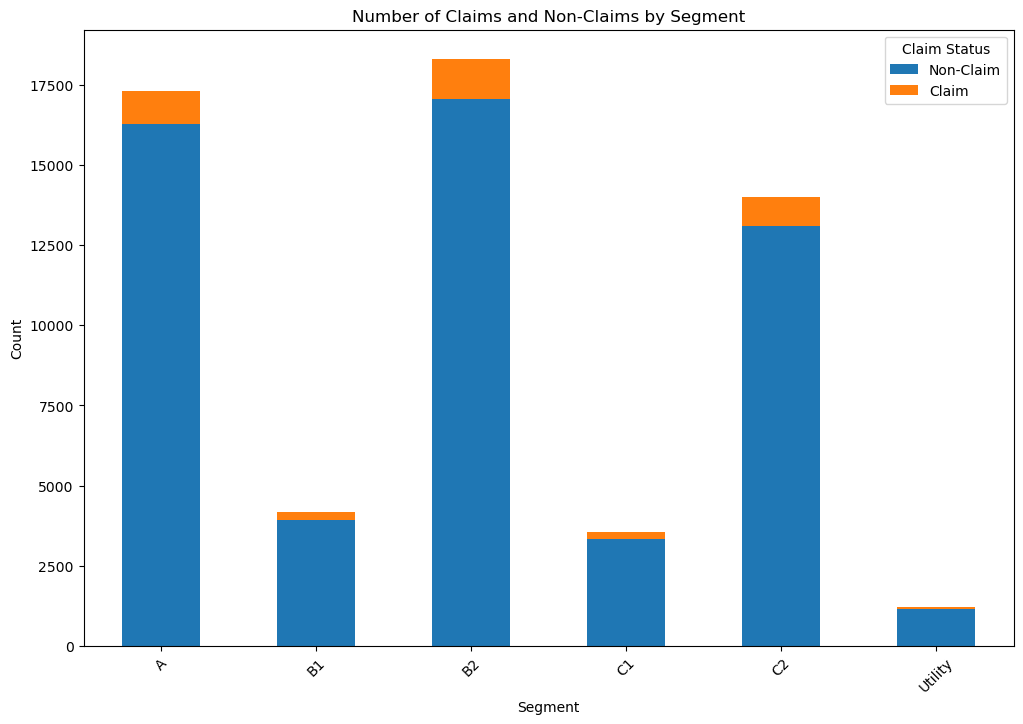

In [35]:
df_grouped = df.groupBy("is_claim", "segment").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='segment', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Segment')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [36]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("cylinder").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

c3_claims = df_claims.filter(col("cylinder") == 3).count()
c4_claims = df_claims.filter(col("cylinder") == 4).count()

if c3_claims > c4_claims:
    print("Kebanyakan mobil yang melakukan klaim memiliki 3 cylinder.")
else:
    print("Kebanyakan mobil yang melakukan klaim memiliki 4 cylinder.")

df_c3_brakes = df.filter(col("cylinder") == 3)
df_c4_brakes = df.filter(col("cylinder") == 4)

total_c3_brakes = df_c3_brakes.count()
total_c4_brakes = df_c4_brakes.count()

if total_c3_brakes > 0:
    c3_claim_percentage = (c3_claims / total_c3_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan 3 cylinder dari total mobil adalah {c3_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan 3 cylinder dalam dataset.")

if total_c4_brakes > 0:
    c4_claim_percentage = (c4_claims / total_c4_brakes) * 100
    print(f"Persentase klaim untuk mobil dengan 4 cylinder dari total mobil adalah {c4_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan 4 cylinder dalam dataset.")

+--------+-----------+
|cylinder|claim_count|
+--------+-----------+
|       3|       1305|
|       4|       2443|
+--------+-----------+

+--------+-----------+-----------------+
|cylinder|claim_count|       percentage|
+--------+-----------+-----------------+
|       3|       1305|34.81856990394877|
|       4|       2443|65.18143009605123|
+--------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim memiliki 4 cylinder.
Persentase klaim untuk mobil dengan 3 cylinder dari total mobil adalah 5.97%.
Persentase klaim untuk mobil dengan 4 cylinder dari total mobil adalah 6.65%.


+--------+-----------+
|gear_box|claim_count|
+--------+-----------+
|       5|       2832|
|       6|        916|
+--------+-----------+

+--------+-----------+------------------+
|gear_box|claim_count|        percentage|
+--------+-----------+------------------+
|       5|       2832| 75.56029882604055|
|       6|        916|24.439701173959445|
+--------+-----------+------------------+

Kebanyakan mobil yang melakukan klaim mempunyai 5 gear box.
Persentase mobil dengan 5 gear box yang melakukan klaim adalah 6.41%.
Persentase mobil tanpa 6 gear box yang melakukan klaim adalah 6.37%.


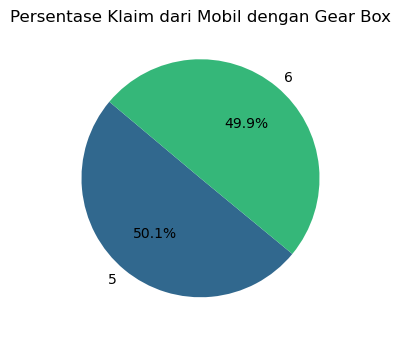

In [37]:
# Filter DataFrame untuk klaim
df_claims = df.filter(col("is_claim") == 1)

df_grouped = df_claims.groupBy("gear_box").agg(count("*").alias("claim_count"))
df_grouped.show()

total_claims = df_claims.count()

df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

g5_claims = df_claims.filter(col("gear_box") == 5).count()
g6_claims = df_claims.filter(col("gear_box") == 6).count()

if g5_claims > g6_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai 5 gear box.")
else:
    print("Kebanyakan mobil yang melakukan klaim mempunyai 6 gear box.")

total_g5 = df.filter(col("gear_box") == 5).count()
total_g6 = df.filter(col("gear_box") == 6).count()

if total_g5 > 0:
    g5_claim_percentage = (g5_claims / total_g5) * 100
    print(f"Persentase mobil dengan 5 gear box yang melakukan klaim adalah {g5_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil dengan 5 gear box dalam dataset.")

if total_g6 > 0:
    g6_claim_percentage = (g6_claims / total_g6) * 100
    print(f"Persentase mobil tanpa 6 gear box yang melakukan klaim adalah {g6_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil tanpa 5 gear box dalam dataset.")

# Konversi hasil perhitungan ke Pandas DataFrame untuk visualisasi
result_data = {
    'gear_box': [5, 6],
    'total_cars': [total_g5, total_g6],
    'claim_count': [g5_claims, g6_claims],
    'claim_percentage': [g5_claim_percentage, g6_claim_percentage]
}

result_df = pd.DataFrame(result_data)

# Plotting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
labels = result_df['gear_box']
sizes = result_df['claim_percentage']
colors = sns.color_palette('viridis', len(labels))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Klaim dari Mobil dengan Gear Box')

# Show plot
plt.tight_layout()
plt.show()

In [38]:
# Filter DataFrame untuk klaim
df_claims = df.filter(col("is_claim") == 1)

# Group by is_brake_assist
df_grouped = df_claims.groupBy("is_brake_assist", "is_speed_alert").agg(count("*").alias("claim_count"))
df_grouped.show()

# Total klaim
total_claims = df_claims.count()

# Hitung persentase klaim berdasarkan is_brake_assist & is_speed_alert
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()

claims_brake_alert_yes_yes = df_claims.filter((col("is_brake_assist") == 'Yes') & (col("is_speed_alert") == 'Yes')).count()
claims_brake_alert_either_yes = df_claims.filter((col("is_brake_assist") == 'Yes') | (col("is_speed_alert") == 'Yes')).count()
claims_brake_alert_no_no = df_claims.filter((col("is_brake_assist") == 'No') & (col("is_speed_alert") == 'No')).count()

# Menentukan filter dengan jumlah klaim tertinggi
if (claims_brake_alert_yes_yes >= claims_brake_alert_either_yes) and (claims_brake_alert_yes_yes >= claims_brake_alert_no_no):
    print("Kebanyakan mobil yang melakukan klaim memiliki brake assist dan speed alert.")
elif (claims_brake_alert_either_yes >= claims_brake_alert_yes_yes) and (claims_brake_alert_either_yes >= claims_brake_alert_no_no):
    print("Kebanyakan mobil yang melakukan klaim memiliki brake assist atau speed alert")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak memiliki brake assist dan speed alert.")

# Hitung total mobil dengan is_brake_assist dan is_speed_alert
total_brake_alert_yes_yes = df.filter((col("is_brake_assist") == 'Yes') & (col("is_speed_alert") == 'Yes')).count()
total_brake_alert_no_yes = df.filter((col("is_brake_assist") == 'Yes') | (col("is_speed_alert") == 'Yes')).count()
total_brake_alert_no_no = df.filter((col("is_brake_assist") == 'No') & (col("is_speed_alert") == 'No')).count()

# Hitung persentase klaim untuk mobil dengan is_brake_assist dan is_speed_alert
if total_brake_alert_yes_yes > 0:
    brake_alert_claim_percentage = (claims_brake_alert_yes_yes / total_brake_alert_yes_yes) * 100
    print(f"Persentase mobil yang memiliki brake assist dan speed alert yang melakukan klaim adalah {brake_alert_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil yang memiliki brake assist dan speed alert dalam dataset.")

# Hitung persentase mobil dengan is_brake_assist dan is_speed_alert dari total mobil dengan is_brake_assist atau is_speed_alert
if total_brake_alert_no_yes > 0:
    brake_or_speed_alert_claim_percentage = (claims_brake_alert_yes_yes / total_brake_alert_no_yes) * 100
    print(f"Persentase mobil yang memiliki brake assist dan speed alert dari total mobil dengan is_brake_assist atau is_speed_alert adalah {brake_or_speed_alert_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil yang memiliki brake assist atau speed alert dalam dataset.")

# Hitung persentase mobil dengan tidak is_brake_assist dan tidak is_speed_alert dari total mobil dengan tidak is_brake_assist dan tidak is_speed_alert
if total_brake_alert_no_no > 0:
    no_brake_or_speed_alert_claim_percentage = (claims_brake_alert_yes_yes / total_brake_alert_no_no) * 100
    print(f"Persentase mobil yang memiliki brake assist dan speed alert dari total mobil tanpa is_brake_assist dan is_speed_alert adalah {no_brake_or_speed_alert_claim_percentage:.2f}%.")
else:
    print("Tidak ada mobil yang tidak memiliki brake assist dan tidak memiliki speed alert dalam dataset.")

+---------------+--------------+-----------+
|is_brake_assist|is_speed_alert|claim_count|
+---------------+--------------+-----------+
|            Yes|           Yes|       2121|
|            Yes|            No|         15|
|             No|           Yes|       1612|
+---------------+--------------+-----------+

+---------------+--------------+-----------+-------------------+
|is_brake_assist|is_speed_alert|claim_count|         percentage|
+---------------+--------------+-----------+-------------------+
|            Yes|           Yes|       2121|  56.59018143009605|
|            Yes|            No|         15|0.40021344717182494|
|             No|           Yes|       1612| 43.009605122732125|
+---------------+--------------+-----------+-------------------+

Kebanyakan mobil yang melakukan klaim memiliki brake assist atau speed alert
Persentase mobil yang memiliki brake assist dan speed alert yang melakukan klaim adalah 6.67%.
Persentase mobil yang memiliki brake assist dan speed al

# UBAH DATA MENJADI ANGKA

In [39]:
# Kolom yang akan diubah tipe datanya
columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                      'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
                      'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
                      'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
                      'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
                      'is_ecw', 'is_speed_alert']
# Mengubah nilai 'yes' menjadi 1 dan 'no' menjadi 0
for column in columns:
    df = df.withColumn(column, when(col(column) == 'Yes', 1).otherwise(0))
    dt = dt.withColumn(column, when(col(column) == 'Yes', 1).otherwise(0))


# Daftar kolom yang ingin Anda ubah menjadi float
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'turning_radius']
# Loop melalui setiap kolom dan mengonversi tipe datanya menjadi float
for column in columns:
    df = df.withColumn(column, col(column).cast('float'))
    dt = dt.withColumn(column, col(column).cast('float'))


# Daftar kolom yang ingin Anda ubah menjadi integer
columns = ['population_density', 'make','airbags', 'displacement','cylinder', 'gear_box', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']
# Loop melalui setiap kolom dan mengonversi tipe datanya menjadi integer
for column in columns:
    df = df.withColumn(column, col(column).cast('int'))
    if column != 'is_claim':
        dt = dt.withColumn(column, col(column).cast('int'))


# Mengubah nilai dalam kolom 'area_cluster'
for i in range(1, 23):
    cluster_name = 'C' + str(i)
    df = df.withColumn('area_cluster', regexp_replace(col('area_cluster'), cluster_name, str(i)))
    dt = dt.withColumn('area_cluster', regexp_replace(col('area_cluster'), cluster_name, str(i)))

df = df.withColumn('area_cluster', col('area_cluster').cast('int'))
dt = dt.withColumn('area_cluster', col('area_cluster').cast('int'))


# Mengubah nilai dalam kolom 'segment'
df = df.withColumn('segment',
                   when(col('segment') == 'A', 1.0)
                   .when(col('segment') == 'B1', 2.1)
                   .when(col('segment') == 'B2', 2.2)
                   .when(col('segment') == 'C1', 3.1)
                   .when(col('segment') == 'C2', 3.2)
                   .when(col('segment') == 'Utility', 4.0))
dt = dt.withColumn('segment',
                   when(col('segment') == 'A', 1.0)
                   .when(col('segment') == 'B1', 2.1)
                   .when(col('segment') == 'B2', 2.2)
                   .when(col('segment') == 'C1', 3.1)
                   .when(col('segment') == 'C2', 3.2)
                   .when(col('segment') == 'Utility', 4.0))


# Mengubah nilai dalam kolom 'model'
for i in range(1, 12):
    cluster_name = 'M' + str(i)
    df = df.withColumn('model', regexp_replace(col('model'), cluster_name, str(i)))
    dt = dt.withColumn('model', regexp_replace(col('model'), cluster_name, str(i)))

df = df.withColumn('model', col('model').cast('int'))
dt = dt.withColumn('model', col('model').cast('int'))


# Mengubah nilai dalam kolom 'fuel_type'
df = df.withColumn('fuel_type',
                   when(col('fuel_type') == 'CNG', 1)
                   .when(col('fuel_type') == 'Diesel', 2)
                   .when(col('fuel_type') == 'Petrol', 3))
dt = dt.withColumn('fuel_type',
                   when(col('fuel_type') == 'CNG', 1)
                   .when(col('fuel_type') == 'Diesel', 2)
                   .when(col('fuel_type') == 'Petrol', 3))


# Mengubah nilai dalam kolom 'rear_brakes_type'
df = df.withColumn('rear_brakes_type',
                   when(col('rear_brakes_type') == 'Disc', 1)
                   .when(col('rear_brakes_type') == 'Drum', 2))
dt = dt.withColumn('rear_brakes_type',
                   when(col('rear_brakes_type') == 'Disc', 1)
                   .when(col('rear_brakes_type') == 'Drum', 2))


# Mengubah nilai dalam kolom 'transmission_type'
df = df.withColumn('transmission_type',
                   when(col('transmission_type') == 'Automatic', 1)
                   .when(col('transmission_type') == 'Manual', 2))
dt = dt.withColumn('transmission_type',
                   when(col('transmission_type') == 'Automatic', 1)
                   .when(col('transmission_type') == 'Manual', 2))


# Mengubah nilai dalam kolom 'steering_type'
df = df.withColumn('steering_type',
                   when(col('steering_type') == 'Electric', 1)
                   .when(col('steering_type') == 'Manual', 2)
                   .when(col('steering_type') == 'Power', 3))
dt = dt.withColumn('steering_type',
                   when(col('steering_type') == 'Electric', 1)
                   .when(col('steering_type') == 'Manual', 2)
                   .when(col('steering_type') == 'Power', 3))


df.printSchema()
dt.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- policy_tenure: float (nullable = true)
 |-- age_of_car: float (nullable = true)
 |-- age_of_policyholder: float (nullable = true)
 |-- area_cluster: integer (nullable = true)
 |-- population_density: integer (nullable = true)
 |-- make: integer (nullable = true)
 |-- segment: double (nullable = true)
 |-- model: integer (nullable = true)
 |-- fuel_type: integer (nullable = true)
 |-- max_torque: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- airbags: integer (nullable = true)
 |-- is_esc: integer (nullable = false)
 |-- is_adjustable_steering: integer (nullable = false)
 |-- is_tpms: integer (nullable = false)
 |-- is_parking_sensors: integer (nullable = false)
 |-- is_parking_camera: integer (nullable = false)
 |-- rear_brakes_type: integer (nullable = true)
 |-- displacement: integer (nullable = true)
 |-- cylinder: integer (nullable = true)
 |-- transmission_type: in

#  Preparing Train Data

In [40]:
final_df = df.select(['policy_id','age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera', 'is_claim' ])
final_dt = dt.select(['policy_id', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera' ])

In [41]:
#untuk testing model maka akan menggunakan sample data sebanyak 10000 saja 
sample_df = final_df.limit(10000)
sample_df.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|is_claim|
+---------+----------+-------------------+------------------+------------------+-----------------+--------+
|  ID00001|      0.05|          0.6442308|              4990|                 1|                0|       0|
|  ID00002|      0.02|              0.375|             27003|                 1|                0|       0|
|  ID00003|      0.02|          0.3846154|              4076|                 1|                0|       0|
|  ID00004|      0.11|         0.43269232|             21622|                 1|                1|       0|
|  ID00005|      0.11|         0.63461536|             34738|                 0|                1|       0|
|  ID00006|      0.07|          0.5192308|             13051|                 1|                1|       0|
|  ID00007|      0.16|      

In [42]:
#untuk testing model maka akan menggunakan sample data sebanyak 1000 saja 
sample_dt = final_dt.limit(1000)
sample_dt.show()

+---------+----------+-------------------+------------------+------------------+-----------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|
+---------+----------+-------------------+------------------+------------------+-----------------+
|  ID58593|       0.0|         0.58653843|              4076|                 1|                0|
|  ID58594|      0.13|         0.44230768|              8794|                 1|                0|
|  ID58595|      0.12|         0.45192307|              8794|                 0|                1|
|  ID58596|      0.01|         0.46153846|             34738|                 1|                0|
|  ID58597|      0.02|         0.63461536|             34738|                 1|                0|
|  ID58598|      0.15|         0.44230768|              8794|                 1|                1|
|  ID58599|      0.09|         0.35576922|             16206|                 1|                0|
|  ID58600

In [43]:
# Import required packages
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols=['age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera'], outputCol='features')
sample_df = assembler.transform(sample_df)
sample_dt = assembler.transform(sample_dt)
sample_df.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------+--------------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|is_claim|            features|
+---------+----------+-------------------+------------------+------------------+-----------------+--------+--------------------+
|  ID00001|      0.05|          0.6442308|              4990|                 1|                0|       0|[0.05000000074505...|
|  ID00002|      0.02|              0.375|             27003|                 1|                0|       0|[0.01999999955296...|
|  ID00003|      0.02|          0.3846154|              4076|                 1|                0|       0|[0.01999999955296...|
|  ID00004|      0.11|         0.43269232|             21622|                 1|                1|       0|[0.10999999940395...|
|  ID00005|      0.11|         0.63461536|             34738|                 0|                1

In [44]:
sample_dt.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|            features|
+---------+----------+-------------------+------------------+------------------+-----------------+--------------------+
|  ID58593|       0.0|         0.58653843|              4076|                 1|                0|[0.0,0.5865384340...|
|  ID58594|      0.13|         0.44230768|              8794|                 1|                0|[0.12999999523162...|
|  ID58595|      0.12|         0.45192307|              8794|                 0|                1|[0.11999999731779...|
|  ID58596|      0.01|         0.46153846|             34738|                 1|                0|[0.00999999977648...|
|  ID58597|      0.02|         0.63461536|             34738|                 1|                0|[0.01999999955296...|
|  ID58598|      0.15|         0.4423076

In [45]:
feature_vector_df = sample_df.select(['features', 'is_claim'])
feature_vector_df = feature_vector_df.withColumn('is_claim', feature_vector_df['is_claim'].cast(DoubleType()))
feature_vector_df.show(truncate=False)

feature_vector_dt = sample_dt.select(['features'])
# feature_vector_dt = feature_vector_dt.withColumn('is_claim', feature_vector_dt['is_claim'].cast(DoubleType()))
feature_vector_dt.show(truncate=False)

+---------------------------------------------------------+--------+
|features                                                 |is_claim|
+---------------------------------------------------------+--------+
|[0.05000000074505806,0.6442307829856873,4990.0,1.0,0.0]  |0.0     |
|[0.019999999552965164,0.375,27003.0,1.0,0.0]             |0.0     |
|[0.019999999552965164,0.38461539149284363,4076.0,1.0,0.0]|0.0     |
|[0.10999999940395355,0.4326923191547394,21622.0,1.0,1.0] |0.0     |
|[0.10999999940395355,0.6346153616905212,34738.0,0.0,1.0] |0.0     |
|[0.07000000029802322,0.5192307829856873,13051.0,1.0,1.0] |0.0     |
|[0.1599999964237213,0.4038461446762085,6112.0,1.0,0.0]   |0.0     |
|[0.14000000059604645,0.42307692766189575,8794.0,1.0,0.0] |0.0     |
|[0.07000000029802322,0.29807692766189575,6112.0,1.0,1.0] |0.0     |
|[0.03999999910593033,0.4423076808452606,17804.0,1.0,1.0] |0.0     |
|[0.009999999776482582,0.5961538553237915,34738.0,1.0,0.0]|0.0     |
|[0.11999999731779099,0.2980769276

In [46]:
all_df = df.select(['age_of_car', 'is_front_fog_lights', 'is_esc', 'is_speed_alert', 'is_central_locking',
        'transmission_type', 'gear_box', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger','is_claim', 'is_parking_sensors'  ])
all_df.show()

+----------+-------------------+------+--------------+------------------+-----------------+--------+--------------------------------+-----------------------------+--------------------+---------------------+-----------------------+--------+------------------+
|age_of_car|is_front_fog_lights|is_esc|is_speed_alert|is_central_locking|transmission_type|gear_box|is_driver_seat_height_adjustable|is_day_night_rear_view_mirror|is_rear_window_wiper|is_rear_window_washer|is_rear_window_defogger|is_claim|is_parking_sensors|
+----------+-------------------+------+--------------+------------------+-----------------+--------+--------------------------------+-----------------------------+--------------------+---------------------+-----------------------+--------+------------------+
|      0.05|                  0|     0|             1|                 0|                2|       5|                               0|                            0|                   0|                    0|                 

In [47]:
all_dt = dt.select(['age_of_car', 'is_front_fog_lights', 'is_esc', 'is_speed_alert', 'is_central_locking',
        'transmission_type', 'gear_box', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger','is_claim', 'is_parking_sensors'  ])
all_dt.show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `is_claim` cannot be resolved. Did you mean one of the following? [`is_ecw`, `is_esc`, `is_tpms`, `airbags`, `height`].;
'Project [age_of_car#15061, is_front_fog_lights#13904, is_esc#13459, is_speed_alert#14883, is_central_locking#14438, transmission_type#19734, gear_box#15773, is_driver_seat_height_adjustable#14616, is_day_night_rear_view_mirror#14705, is_rear_window_wiper#13993, is_rear_window_washer#14082, is_rear_window_defogger#14171, 'is_claim, is_parking_sensors#13726]
+- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, model#19467, fuel_type#19556, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#19645, displacement#15595, cylinder#15684, transmission_type#19734, gear_box#15773, ... 19 more fields]
   +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, model#19467, fuel_type#19556, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#19645, displacement#15595, cylinder#15684, CASE WHEN (transmission_type#366 = Automatic) THEN 1 WHEN (transmission_type#366 = Manual) THEN 2 END AS transmission_type#19734, gear_box#15773, ... 19 more fields]
      +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, model#19467, fuel_type#19556, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, CASE WHEN (rear_brakes_type#363 = Disc) THEN 1 WHEN (rear_brakes_type#363 = Drum) THEN 2 END AS rear_brakes_type#19645, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
         +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, model#19467, CASE WHEN (fuel_type#353 = CNG) THEN 1 WHEN (fuel_type#353 = Diesel) THEN 2 WHEN (fuel_type#353 = Petrol) THEN 3 END AS fuel_type#19556, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
            +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, cast(model#19378 as int) AS model#19467, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
               +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#19289, M11, 11, 1) AS model#19378, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                  +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#19200, M10, 10, 1) AS model#19289, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                     +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#19111, M9, 9, 1) AS model#19200, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                        +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#19022, M8, 8, 1) AS model#19111, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                           +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#18933, M7, 7, 1) AS model#19022, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                              +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#18844, M6, 6, 1) AS model#18933, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                 +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#18755, M5, 5, 1) AS model#18844, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                    +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#18666, M4, 4, 1) AS model#18755, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                       +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#18577, M3, 3, 1) AS model#18666, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                          +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#18488, M2, 2, 1) AS model#18577, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                             +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, segment#18399, regexp_replace(model#352, M1, 1, 1) AS model#18488, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#18310, population_density#15328, make#15417, CASE WHEN (segment#351 = A) THEN 1.0 WHEN (segment#351 = B1) THEN 2.1 WHEN (segment#351 = B2) THEN 2.2 WHEN (segment#351 = C1) THEN 3.1 WHEN (segment#351 = C2) THEN 3.2 WHEN (segment#351 = Utility) THEN 4.0 END AS segment#18399, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                   +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, cast(area_cluster#18221 as int) AS area_cluster#18310, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                      +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#18132, C22, 22, 1) AS area_cluster#18221, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                         +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#18043, C21, 21, 1) AS area_cluster#18132, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                            +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17954, C20, 20, 1) AS area_cluster#18043, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                               +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17865, C19, 19, 1) AS area_cluster#17954, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                  +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17776, C18, 18, 1) AS area_cluster#17865, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                     +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17687, C17, 17, 1) AS area_cluster#17776, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                        +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17598, C16, 16, 1) AS area_cluster#17687, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                           +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17509, C15, 15, 1) AS area_cluster#17598, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                              +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17420, C14, 14, 1) AS area_cluster#17509, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                 +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17331, C13, 13, 1) AS area_cluster#17420, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                    +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17242, C12, 12, 1) AS area_cluster#17331, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                       +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17153, C11, 11, 1) AS area_cluster#17242, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                          +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#17064, C10, 10, 1) AS area_cluster#17153, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                             +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16975, C9, 9, 1) AS area_cluster#17064, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16886, C8, 8, 1) AS area_cluster#16975, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                   +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16797, C7, 7, 1) AS area_cluster#16886, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                      +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16708, C6, 6, 1) AS area_cluster#16797, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                         +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16619, C5, 5, 1) AS area_cluster#16708, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                            +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16530, C4, 4, 1) AS area_cluster#16619, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                               +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16441, C3, 3, 1) AS area_cluster#16530, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                  +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#16352, C2, 2, 1) AS area_cluster#16441, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                     +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, regexp_replace(area_cluster#348, C1, 1, 1) AS area_cluster#16352, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                        +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                           +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                              +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                                 +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                                    +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, gear_box#15773, ... 19 more fields]
                                                                                                                                       +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cylinder#15684, transmission_type#366, cast(gear_box#367 as int) AS gear_box#15773, ... 19 more fields]
                                                                                                                                          +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#15595, cast(cylinder#365 as int) AS cylinder#15684, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                             +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, cast(displacement#364 as int) AS displacement#15595, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, cast(airbags#357 as int) AS airbags#15506, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                   +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#15328, cast(make#350 as int) AS make#15417, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                      +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, cast(population_density#349 as int) AS population_density#15328, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                         +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, age_of_policyholder#15150, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                            +- Project [policy_id#344, policy_tenure#14972, age_of_car#15061, cast(age_of_policyholder#347 as float) AS age_of_policyholder#15150, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                               +- Project [policy_id#344, policy_tenure#14972, cast(age_of_car#346 as float) AS age_of_car#15061, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                  +- Project [policy_id#344, cast(policy_tenure#345 as float) AS policy_tenure#14972, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                     +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                        +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                           +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                              +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                 +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                    +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                       +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                          +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                             +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                   +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                      +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                         +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, is_parking_sensors#13726, CASE WHEN (is_parking_camera#362 = Yes) THEN 1 ELSE 0 END AS is_parking_camera#13815, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                            +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, is_tpms#13637, CASE WHEN (is_parking_sensors#361 = Yes) THEN 1 ELSE 0 END AS is_parking_sensors#13726, is_parking_camera#362, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                               +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, is_adjustable_steering#13548, CASE WHEN (is_tpms#360 = Yes) THEN 1 ELSE 0 END AS is_tpms#13637, is_parking_sensors#361, is_parking_camera#362, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                                  +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, is_esc#13459, CASE WHEN (is_adjustable_steering#359 = Yes) THEN 1 ELSE 0 END AS is_adjustable_steering#13548, is_tpms#360, is_parking_sensors#361, is_parking_camera#362, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                                     +- Project [policy_id#344, policy_tenure#345, age_of_car#346, age_of_policyholder#347, area_cluster#348, population_density#349, make#350, segment#351, model#352, fuel_type#353, max_torque#354, max_power#355, engine_type#356, airbags#357, CASE WHEN (is_esc#358 = Yes) THEN 1 ELSE 0 END AS is_esc#13459, is_adjustable_steering#359, is_tpms#360, is_parking_sensors#361, is_parking_camera#362, rear_brakes_type#363, displacement#364, cylinder#365, transmission_type#366, gear_box#367, ... 19 more fields]
                                                                                                                                                                                                                        +- Relation [policy_id#344,policy_tenure#345,age_of_car#346,age_of_policyholder#347,area_cluster#348,population_density#349,make#350,segment#351,model#352,fuel_type#353,max_torque#354,max_power#355,engine_type#356,airbags#357,is_esc#358,is_adjustable_steering#359,is_tpms#360,is_parking_sensors#361,is_parking_camera#362,rear_brakes_type#363,displacement#364,cylinder#365,transmission_type#366,gear_box#367,... 19 more fields] csv


In [48]:
assembler = VectorAssembler(inputCols=['age_of_car', 'is_front_fog_lights', 'is_esc', 'is_speed_alert', 'is_central_locking',
        'transmission_type', 'gear_box', 'is_parking_sensors','is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger'
               ], outputCol='features')
all_df = assembler.transform(all_df)
all_df.show()

+----------+-------------------+------+--------------+------------------+-----------------+--------+--------------------------------+-----------------------------+--------------------+---------------------+-----------------------+--------+------------------+--------------------+
|age_of_car|is_front_fog_lights|is_esc|is_speed_alert|is_central_locking|transmission_type|gear_box|is_driver_seat_height_adjustable|is_day_night_rear_view_mirror|is_rear_window_wiper|is_rear_window_washer|is_rear_window_defogger|is_claim|is_parking_sensors|            features|
+----------+-------------------+------+--------------+------------------+-----------------+--------+--------------------------------+-----------------------------+--------------------+---------------------+-----------------------+--------+------------------+--------------------+
|      0.05|                  0|     0|             1|                 0|                2|       5|                               0|                           

In [49]:
features = all_df.select(['features', 'is_claim'])
features = features.withColumn('is_claim', features['is_claim'].cast(DoubleType()))
features.show(truncate=False)

+----------------------------------------------------------------------+--------+
|features                                                              |is_claim|
+----------------------------------------------------------------------+--------+
|(13,[0,3,5,6,7],[0.05000000074505806,1.0,2.0,5.0,1.0])                |0.0     |
|(13,[0,3,5,6,7],[0.019999999552965164,1.0,2.0,5.0,1.0])               |0.0     |
|(13,[0,3,5,6,7],[0.019999999552965164,1.0,2.0,5.0,1.0])               |0.0     |
|[0.10999999940395355,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0] |0.0     |
|(13,[0,3,4,5,6,9],[0.10999999940395355,1.0,1.0,1.0,5.0,1.0])          |0.0     |
|[0.07000000029802322,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0] |0.0     |
|(13,[0,3,4,5,6,7],[0.1599999964237213,1.0,1.0,2.0,5.0,1.0])           |0.0     |
|[0.14000000059604645,1.0,0.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0] |0.0     |
|[0.07000000029802322,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0] |0.0     |
|[0.039999999105

# Building Classification Model

In [50]:
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression

In [51]:
(trainData, testData) = feature_vector_df.randomSplit([0.7, 0.3], seed=11)

In [52]:
model1 = RandomForestClassifier(featuresCol='features', labelCol='is_claim').fit(trainData)
model2 = GBTClassifier(featuresCol='features', labelCol='is_claim').fit(trainData)
model3 = LogisticRegression(featuresCol='features', labelCol='is_claim').fit(trainData)

In [53]:
predictedData1 = model1.transform(testData)
predictedData1.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     1.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
+----------

In [54]:
predictedData2 = model2.transform(testData)
predictedData2.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       1.0|     0.0|[0.0,0.2884615361...|
|       1.0|     0.0|[0.0,0.2884615361...|
|       1.0|     0.0|[0.0,0.2884615361...|
|       1.0|     1.0|[0.0,0.2884615361...|
|       1.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
+----------

In [55]:
predictedData3 = model3.transform(testData)
predictedData3.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     1.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2884615361...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.2980769276...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
|       0.0|     0.0|[0.0,0.3076923191...|
+----------

# WITH ALL DATA

In [56]:
(trainD1, testD1) = features.randomSplit([0.7, 0.3], seed=10)
m1 = RandomForestClassifier(featuresCol='features', labelCol='is_claim').fit(trainD1)
m2 = GBTClassifier(featuresCol='features', labelCol='is_claim').fit(trainD1)
m3 = LogisticRegression(featuresCol='features', labelCol='is_claim').fit(trainD1)
PD1 = m1.transform(testD1)
PD1.select(['prediction', 'is_claim', 'features']).show()
PD2 = m2.transform(testD1)
PD2.select(['prediction', 'is_claim', 'features']).show()
PD3 = m3.transform(testD1)
PD3.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
|       0.0|     0.0|(13,[0,3,4,5,6,7]...|
+----------

In [57]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='is_claim', metricName='accuracy')
m1_accuracy = evaluator.evaluate(PD1)
print('Accuracy of RF classifier    = %g' % (m1_accuracy))
print('Test Error of RF classifier  = %g' % (1.0 - m1_accuracy))
m2_accuracy = evaluator.evaluate(PD2)
print('Accuracy of GBT classifier    = %g' % (m2_accuracy))
print('Test Error of GBT classifier  = %g' % (1.0 - m2_accuracy))
m3_accuracy = evaluator.evaluate(PD3)
print('Accuracy of Logistic Regression = %g' % (m3_accuracy))
print('Test Error of Logistic Regression = %g' % (1.0 - m3_accuracy))

Accuracy of RF classifier    = 0.934615
Test Error of RF classifier  = 0.0653846
Accuracy of GBT classifier    = 0.934615
Test Error of GBT classifier  = 0.0653846
Accuracy of Logistic Regression = 0.934615
Test Error of Logistic Regression = 0.0653846


# Evaluating Classification Model

In [58]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [59]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='is_claim', metricName='accuracy')

In [60]:
# Evaluate accuracy using the evaluator

model1_accuracy = evaluator.evaluate(predictedData1)
print('Accuracy of RF classifier    = %g' % (model1_accuracy))
print('Test Error of RF classifier  = %g' % (1.0 - model1_accuracy))

Accuracy of RF classifier    = 0.940108
Test Error of RF classifier  = 0.0598923


In [61]:
metrics1 = MulticlassMetrics(predictedData1.select(['prediction', 'is_claim']).rdd.map(tuple))
print("GRADIENT-BOOSTED TREE Classifier:")
print("Accuracy                = " + str(metrics1.accuracy))
print("Precision     (survived)= " + str(metrics1.precision(1.0)))
print("Recall        (survived)= " + str(metrics1.recall(1.0)))
print("F1-Measure    (survived)= " + str(metrics1.fMeasure(1.0)))
metrics1.confusionMatrix().toArray()

D:\Apps\Anaconda\Lib\site-packages\pyspark\sql\context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


GRADIENT-BOOSTED TREE Classifier:
Accuracy                = 0.9401076716016151
Precision     (survived)= 0.0
Recall        (survived)= 0.0
F1-Measure    (survived)= 0.0


array([[2794.,    0.],
       [ 178.,    0.]])

In [62]:
model2_accuracy = evaluator.evaluate(predictedData2)
print('Accuracy of GBT classifier    = %g' % (model2_accuracy))
print('Test Error of GBT classifier  = %g' % (1.0 - model2_accuracy))

Accuracy of GBT classifier    = 0.936743
Test Error of GBT classifier  = 0.0632571


In [63]:
metrics2 = MulticlassMetrics(predictedData2.select(['prediction', 'is_claim']).rdd.map(tuple))
print("GRADIENT-BOOSTED TREE Classifier:")
print("Accuracy                = " + str(metrics2.accuracy))
print("Precision     (survived)= " + str(metrics2.precision(1.0)))
print("Recall        (survived)= " + str(metrics2.recall(1.0)))
print("F1-Measure    (survived)= " + str(metrics2.fMeasure(1.0)))
metrics2.confusionMatrix().toArray()

GRADIENT-BOOSTED TREE Classifier:
Accuracy                = 0.9367429340511441
Precision     (survived)= 0.08333333333333333
Recall        (survived)= 0.0056179775280898875
F1-Measure    (survived)= 0.010526315789473684


array([[2.783e+03, 1.100e+01],
       [1.770e+02, 1.000e+00]])

In [64]:
model3_accuracy = evaluator.evaluate(predictedData3)
print('Accuracy of Logistic Regression = %g' % (model3_accuracy))
print('Test Error of Logistic Regression = %g' % (1.0 - model3_accuracy))

Accuracy of Logistic Regression = 0.940108
Test Error of Logistic Regression = 0.0598923


In [65]:
metrics3 = MulticlassMetrics(predictedData3.select(['prediction', 'is_claim']).rdd.map(tuple))
print("GRADIENT-BOOSTED TREE Classifier:")
print("Accuracy                = " + str(metrics3.accuracy))
print("Precision     (survived)= " + str(metrics3.precision(1.0)))
print("Recall        (survived)= " + str(metrics3.recall(1.0)))
print("F1-Measure    (survived)= " + str(metrics3.fMeasure(1.0)))
metrics3.confusionMatrix().toArray()

GRADIENT-BOOSTED TREE Classifier:
Accuracy                = 0.9401076716016151
Precision     (survived)= 0.0
Recall        (survived)= 0.0
F1-Measure    (survived)= 0.0


array([[2794.,    0.],
       [ 178.,    0.]])

# Correlation Matrix

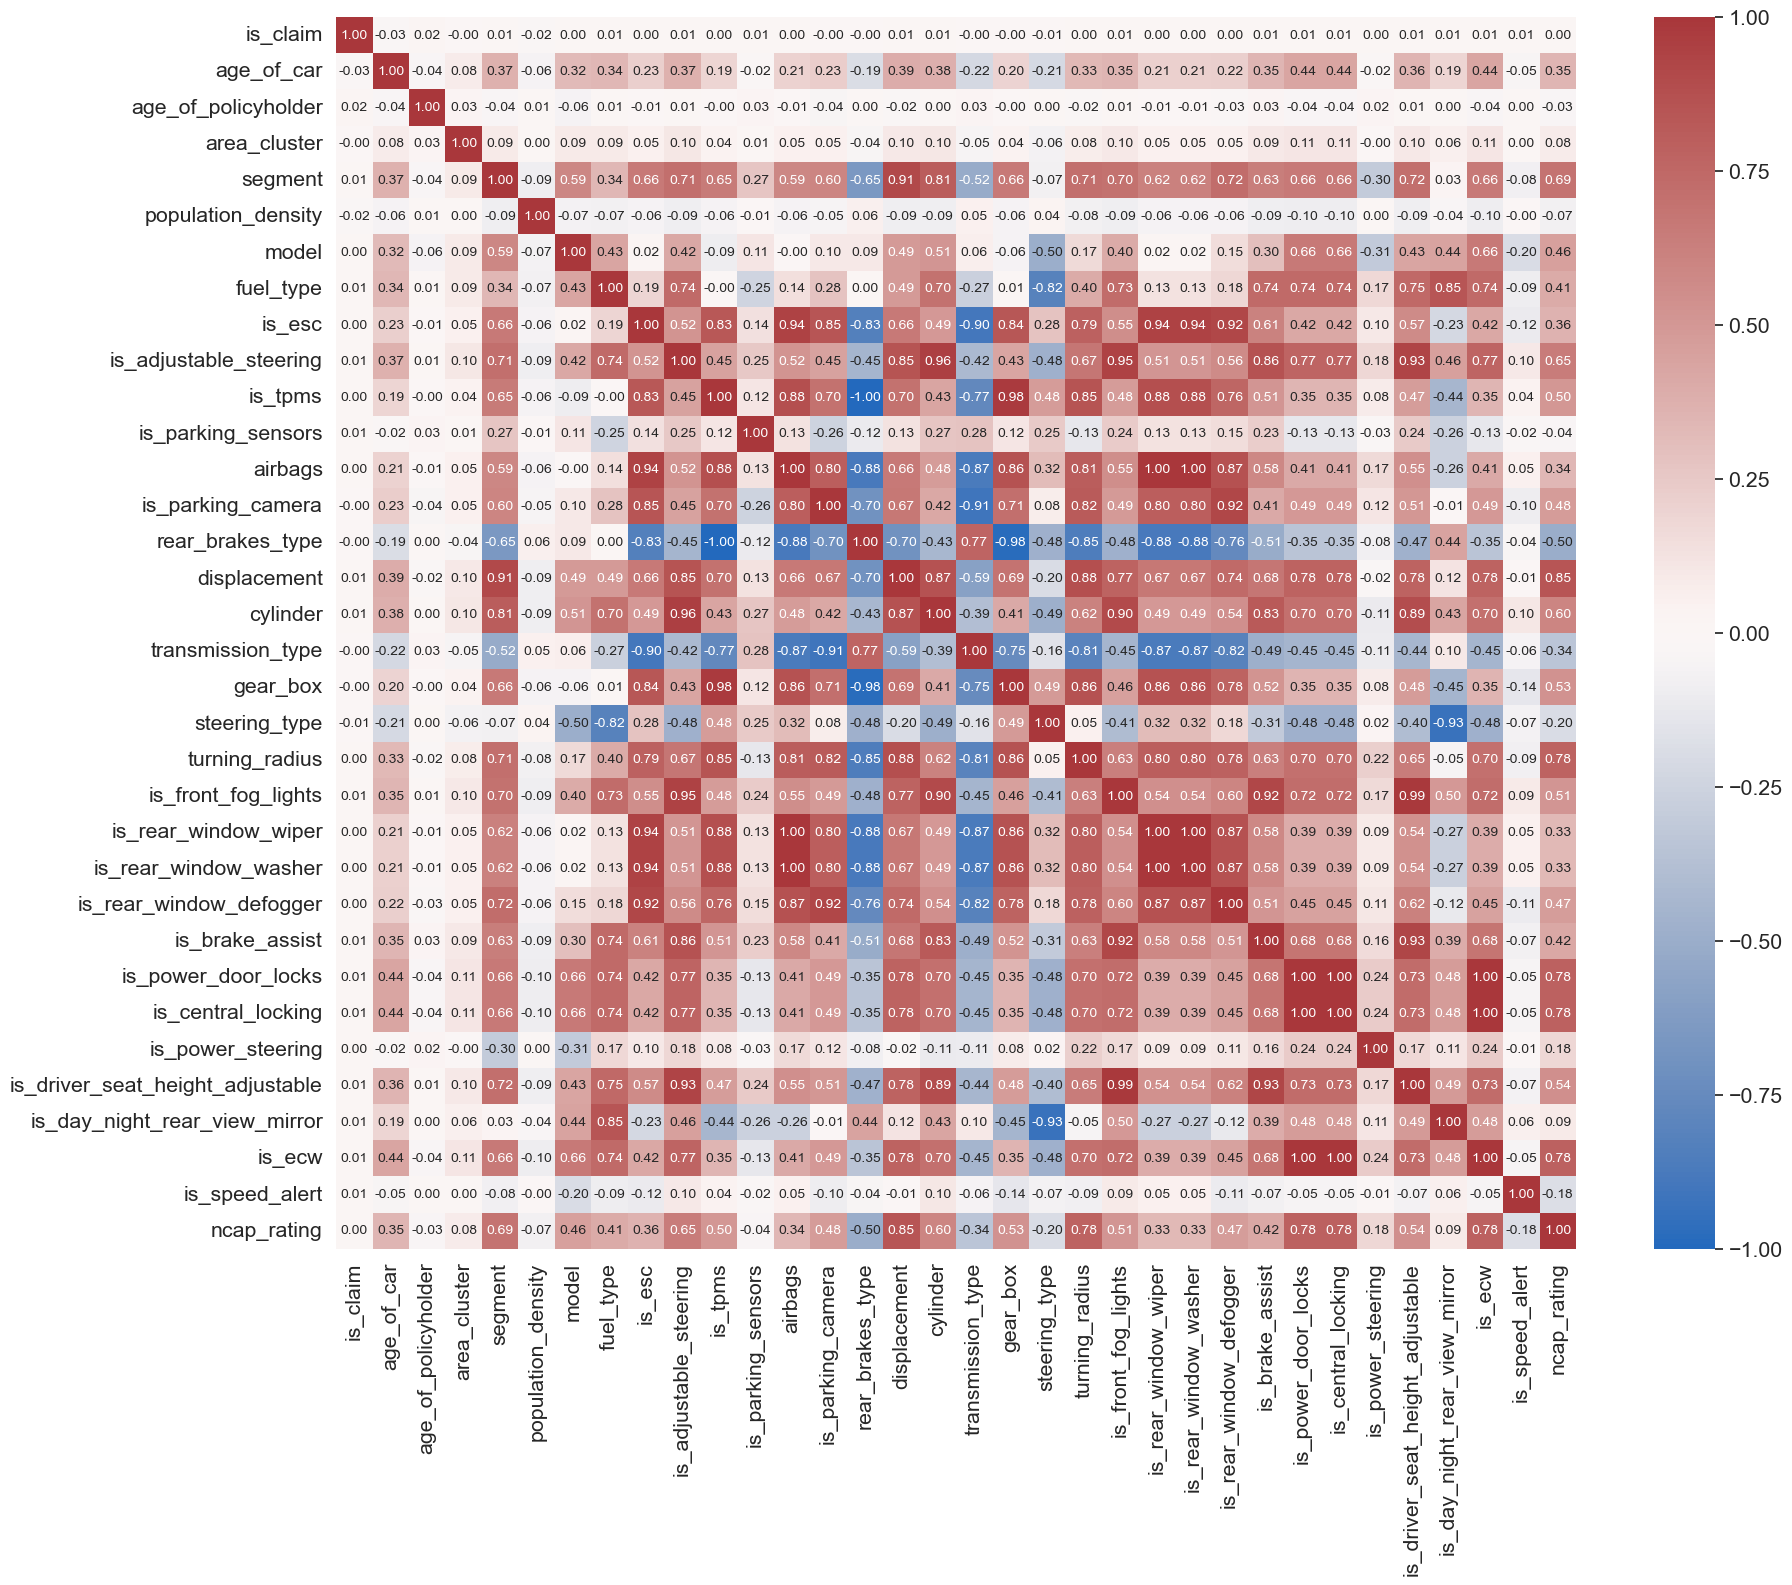

In [66]:
cols = ['is_claim', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'segment', 'population_density', 'model', 'fuel_type', 
        'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'airbags', 'is_parking_camera', 'rear_brakes_type', 
        'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'is_front_fog_lights', 
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
        'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 
        'is_speed_alert', 'ncap_rating']

plt.figure(figsize=(20, 16))
sns.set(font_scale=1.4)
heat = sns.heatmap(data=df.select(cols).toPandas().corr(), cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

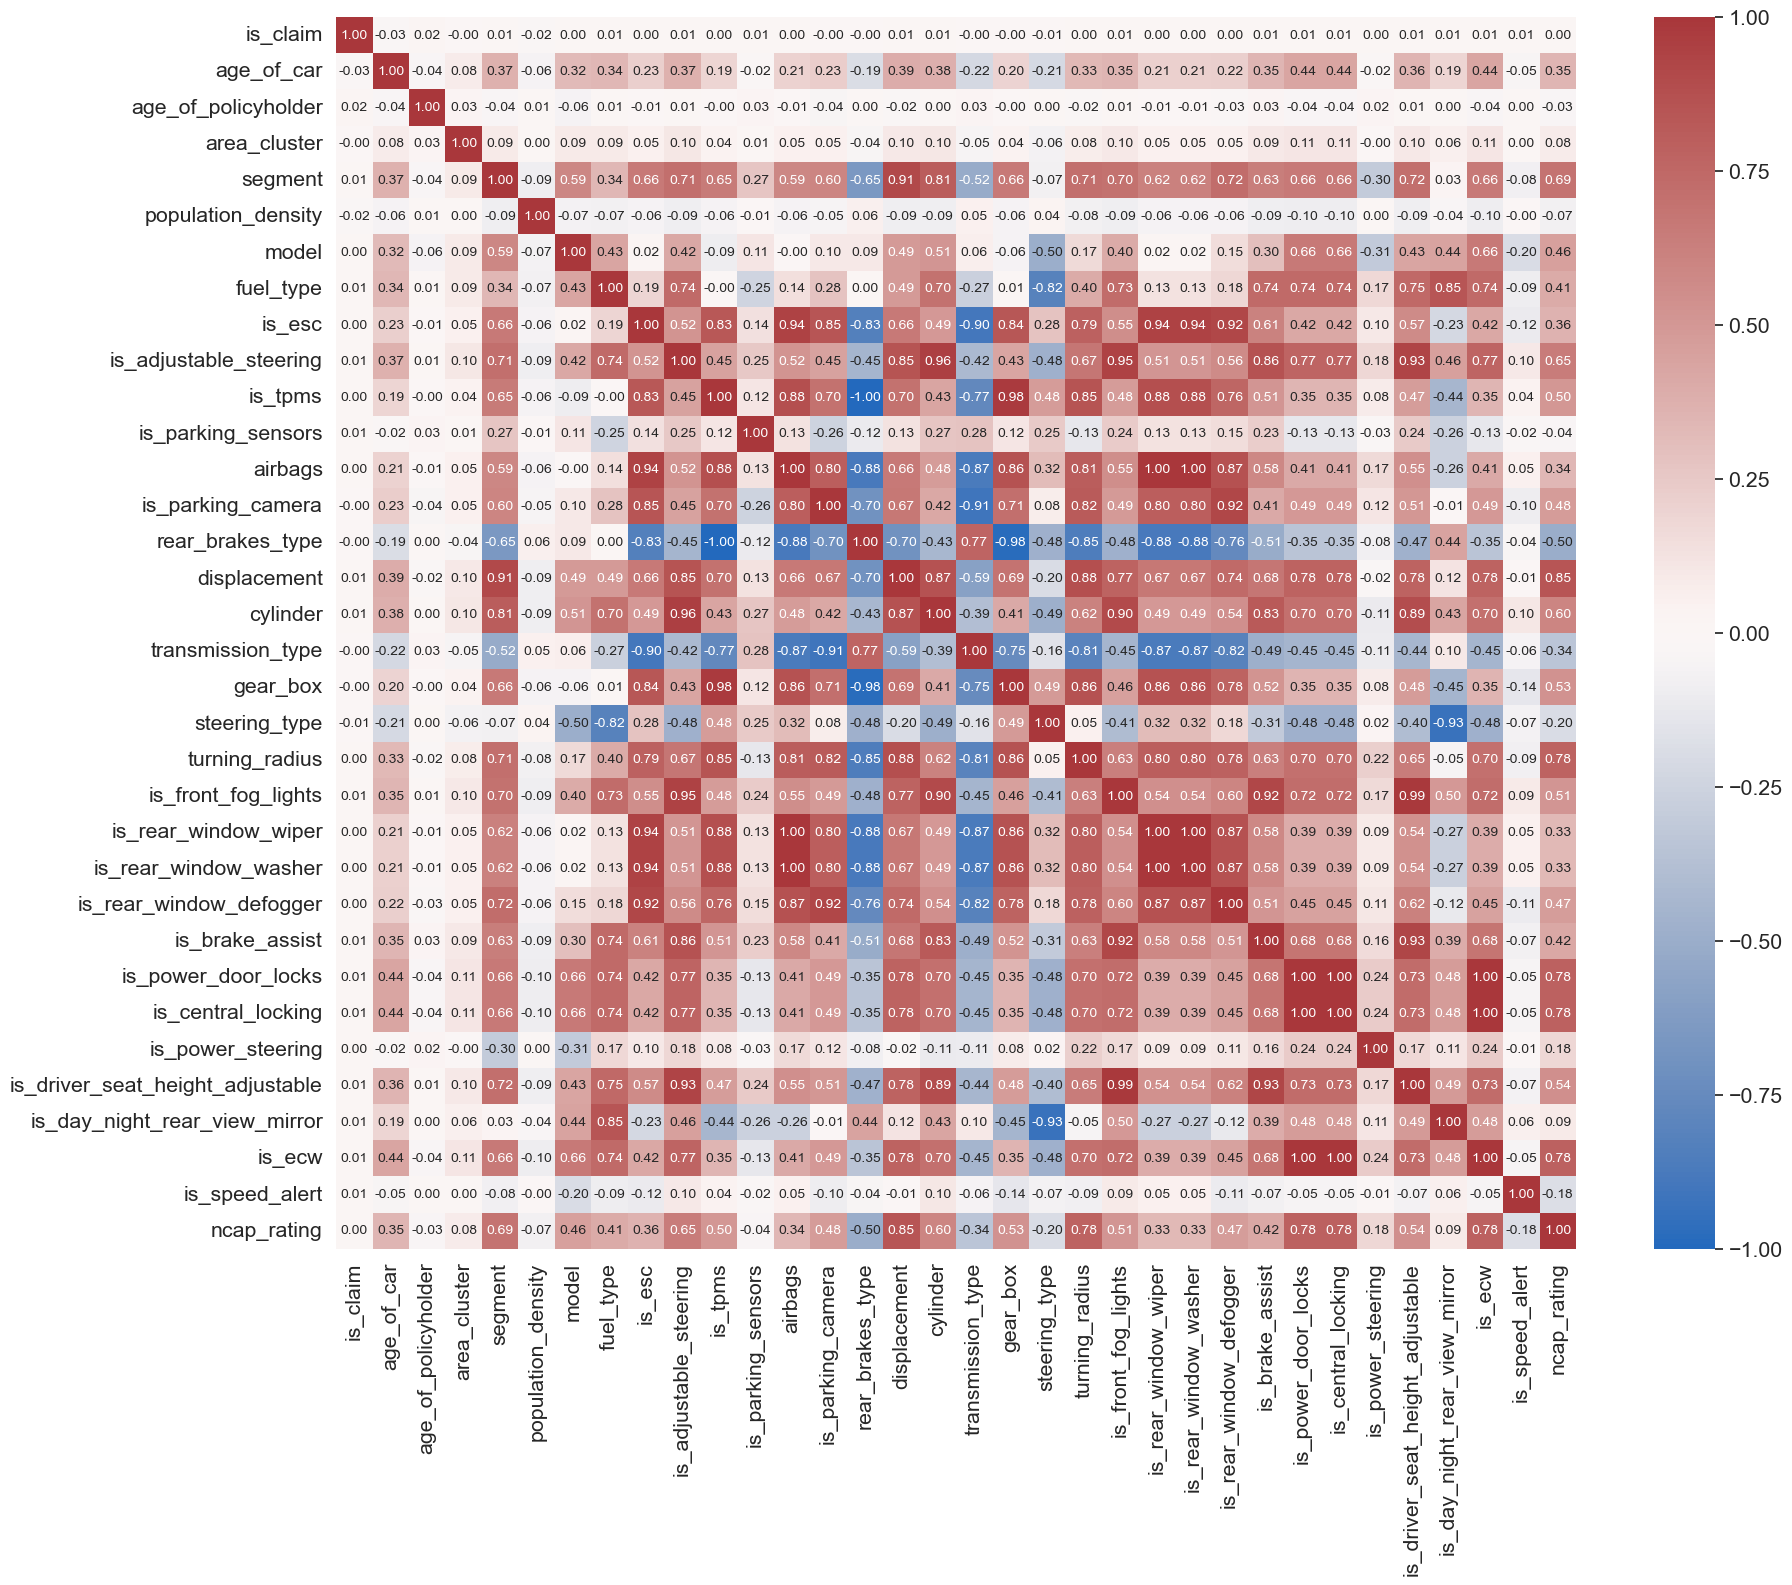

In [67]:
# Ubah data frame menjadi Pandas DataFrame untuk mempermudah analisis
df_pandas = df.toPandas()

# Kolom yang ingin dicek
cols = ['is_claim', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'segment', 'population_density', 'model', 'fuel_type', 
        'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'airbags', 'is_parking_camera', 'rear_brakes_type', 
        'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'is_front_fog_lights', 
        'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 
        'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 
        'is_speed_alert', 'ncap_rating']

# Filter kolom dengan lebih dari satu nilai unik
filtered_cols = [col for col in cols if df_pandas[col].nunique() > 1]

# Tampilkan kolom yang dihapus
for col in cols:
    if col not in filtered_cols:
        print(f"Menghapus kolom {col} karena hanya memiliki 1 nilai unik.")

# Membuat correlation matrix hanya dengan kolom yang relevan dan sudah bersih dari null
corr_matrix = df_pandas[filtered_cols].corr()

plt.figure(figsize=(20, 16))
sns.set(font_scale=1.4)
heat = sns.heatmap(corr_matrix, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.show()

# SPARK Stop

In [68]:
spark.stop()